In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

**Objective and goal for this lab**

For this lab, we're going to see how we can transform images to a format we're used to working with, and can thus use for training classification (or regression) models.

We will be using the MNIST-dataset, which is a famous dataset of handwritten black & white digits between 0-9. Our goal will be to train a classifier to correctly classify each image as the digit it portrays.

You can read more about MNIST [here](https://en.wikipedia.org/wiki/MNIST_database).

---

Install the MNIST-package

In [2]:
!pip install mnist

**Load the data**

In [3]:
import mnist

train_images, train_labels = mnist.train_images(), mnist.train_labels()

test_images, test_labels = mnist.test_images(), mnist.test_labels()

Let's investigate what we just loaded

In [4]:
print('train_images shape :', train_images.shape)
print('test_images shape  :', test_images.shape, end='\n\n')

print('train_labels shape :', train_labels.shape)
print('test_labels shape  :', test_labels.shape)

train_images shape : (60000, 28, 28)
test_images shape  : (10000, 28, 28)

train_labels shape : (60000,)
test_labels shape  : (10000,)


So both train and test images are 3D-arrays. Let's pick the first item in train_images and investigate it

In [5]:
print('train_images[0] :', train_images[0].shape)

train_images[0] : (28, 28)


So, the first (out of 60.000) items in train_images is a 28x28 array. Actually, it's an image of size 28x28 pixels.

We can visualise this easily

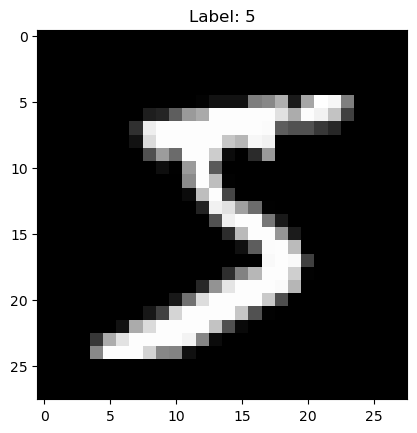

In [11]:
plt.imshow(train_images[0], cmap='gray');
plt.title(f'Label: {train_labels[0]}')
plt.show()

As you might've noticed, the train_labels contain the true labels (i.e., the targets) for each handwritten image.

Let's plot some more images

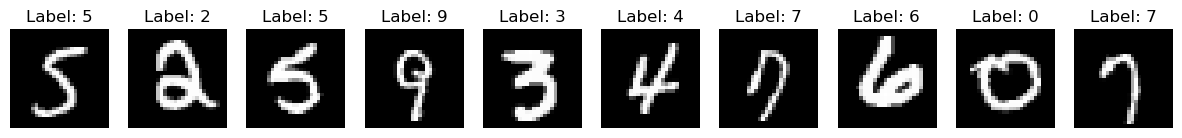

In [14]:
import random

number_of_images = 10

indices = random.sample(range(60000), number_of_images)

fig, axes = plt.subplots(1, number_of_images, figsize=(15, 3))

for idx, ax in zip(indices, axes):
    ax.imshow(train_images[idx], cmap='gray')
    ax.set_title(f'Label: {train_labels[idx]}')
    ax.axis('off')

plt.show()

---

Ok, so how do we transform this data into a format that we can train the models we've learnt about thus far? 

Well,  what we'll do is that we're going to use *every pixel as it's own feature*. Since each image is 28x28 pixels, we're going to have 28x28 = 784 features for each image.

We can use flatten() to transform a 2D (28,28) shaped array to a single 1D (784) array.

In [15]:
# easy transformation

train_images[0].flatten().shape

(784,)

In [16]:
# now we do it for all the images in the train_images

train_images_flattened = [list(image.flatten()) for image in train_images]

In [17]:
train_images_flattened_array = np.array([image.flatten() for image in train_images])

# transform that list to a dataframe so that we can see what's going on
X_train_val = pd.DataFrame(train_images_flattened_array)

X_train_val


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# might aswell make the labels into a dataframe too

y_train_val = pd.DataFrame(train_labels)

y_train_val

,0
0,5
1,0
2,4
3,1
4,9
...,...
59995,8
59996,3
59997,5
59998,6


Cool, no we're on familiar ground! We have our X_train_val (features) and y_train_val (targets) in a suitable format.

Now we can try training some multiclass classification models on this data!

---

## Challenges

**Task 1**

Transform test_images and test_labels similarly as above, and save them as X_test and y_test.

This is the test set you will use at the end, to assess final performance!

**Task 1.5 (bonus**)

Let's normalize our features! Because why not. It won't hurt the algorithms that don't require it - and we might aswell show how easily images can be scaled properly.

In the case for gray-scale images, we simply divide all features (pixels) by 255. Why? Because that's the maximum possible value. This will bring all grayscale values to the range [0,1].

In [27]:
X_train_val = X_train_val/255

X_test = X_test/255

Awesome. Done. Feel free to check that all grayscale values are properly scaled.

**Task 2**

Using all 784 features (no additional feature engineering or manipulation needed), start GridSearching for the best performing hyperparameters for 

KNN, DecisionTree, RandomForest, AdaBoost 

**Task 3**

When you have the best performing hyperparameters, do an ordinary train/validation split on X_train_val and y_train_val.

Train the models with their respective best performing hyperparameters on X_train and then evaluate performance on X_val.

In particular, make good use of confusion matrices here.

**Task 4**

For the models you've trained in Task 3, try plotting the validation samples they classified **incorrectly**. As the title for each image, write the true label and the predicted label.

Do the mistakes kinda make sense? Can you forgive your models? :)

**Task 5**

For each model with the identified best performing hyperparameters, do a full training on X_train_val - then assess performance on X_test.

Which model did you find to perform worst/best? Is the difference large?

**Task 6**

If you feel frisky, you can try a tad more difficult problem. Try loading and training on the [Fashion MNIST](https://www.kaggle.com/datasets/zalando-research/fashionmnist) dataset instead. 

It's a relatively more difficult dataset to classify.